In [22]:
# import libs
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", palette="muted")
import numpy as np
import matplotlib.pyplot as plt

In [5]:
wine_df = pd.read_csv(r'C:\Users\rahul\Desktop\Case_Onsite_Modeling_Wine\wine_dataset.csv')
red_wine_df = wine_df[wine_df['style'].str.contains("red")]
white_wine_df = wine_df[wine_df['style'].str.contains("white")]

In [6]:
red_wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
white_wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
assert white_wine_df.columns.all() == red_wine_df.columns.all()
",".join(list(white_wine_df.columns))

'fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style'

# checking for null values and datatypes

In [12]:
# assert red_wine_df.notnull().all().all()
# red_wine_df.info()
assert white_wine_df.notnull().all().all()
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1599 to 6496
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
style                   4898 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


# Means

In [16]:
# white wines
white_wine_df.mean()

fixed_acidity             6.854788
volatile_acidity          0.278241
citric_acid               0.334192
residual_sugar            6.391415
chlorides                 0.045772
free_sulfur_dioxide      35.308085
total_sulfur_dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [18]:
# red wines
red_wine_df.mean()

fixed_acidity            8.319637
volatile_acidity         0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

## Differences between red and white wine means that are greater than 1.0

In [20]:
mean_diff = white_wine_df.mean() - red_wine_df.mean()
mean_diff_abs = mean_diff.apply(lambda x: abs(x))
mean_diff[mean_diff_abs >= 1.0]

fixed_acidity           -1.464850
residual_sugar           3.852609
free_sulfur_dioxide     19.433163
total_sulfur_dioxide    91.892865
dtype: float64

# Distribution of Quality

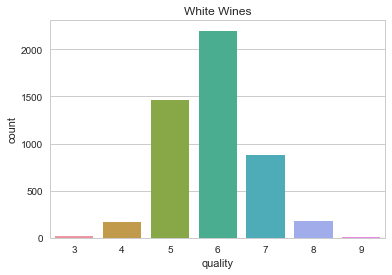

In [37]:
import matplotlib.pyplot as plt
sns.countplot(data=white_wine_df, x="quality")
plt.title('White Wines')

In [38]:
white_wine_df.quality.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

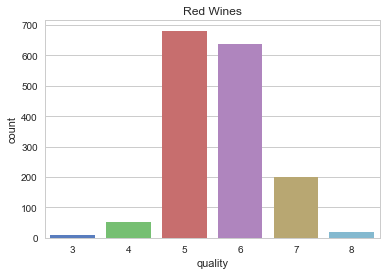

In [39]:
x = sns.countplot(data=red_wine_df, x="quality")
plt.title("Red Wines")

In [40]:
red_wine_df.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

# What may be important for a high quality rating?

### To find out, the percentual mean differences for low quality to high quality wines over the total mean are calculated, resulting in percentual changes.

#### For white wines:

In [41]:
x = white_wine_df.groupby(["quality"]).mean()
lower_quals = x.loc[:4].mean()
higher_quals = x.loc[7:].mean()
ww_perc_means = (higher_quals - lower_quals) / white_wine_df.mean() * 100
ww_perc_means

alcohol                 14.068993
chlorides              -38.372538
citric_acid              7.758984
density                 -0.254610
fixed_acidity           -6.235608
free_sulfur_dioxide    -10.177344
pH                       1.934262
quality                       NaN
residual_sugar          -8.100321
sulphates                1.999155
total_sulfur_dioxide   -18.439304
volatile_acidity       -27.979143
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 5 per cent:

In [42]:
ww_perc_means[abs(ww_perc_means) > 5]

alcohol                 14.068993
chlorides              -38.372538
citric_acid              7.758984
fixed_acidity           -6.235608
free_sulfur_dioxide    -10.177344
residual_sugar          -8.100321
total_sulfur_dioxide   -18.439304
volatile_acidity       -27.979143
dtype: float64

In [43]:
## Comparing low quality means to high quality ones, the following attributes differ more than 10 per cent:
ww_perc_means[abs(ww_perc_means) > 10]

alcohol                 14.068993
chlorides              -38.372538
free_sulfur_dioxide    -10.177344
total_sulfur_dioxide   -18.439304
volatile_acidity       -27.979143
dtype: float64

#### For red wines:

In [45]:
x = red_wine_df.groupby(["quality"]).mean()
lower_quals = x.loc[:4].mean()
higher_quals = x.loc[7:].mean()
rw_perc_means = (higher_quals - lower_quals) / red_wine_df.mean() * 100
rw_perc_means

alcohol                 16.023546
chlorides              -38.955960
citric_acid             77.707371
density                 -0.134937
fixed_acidity            7.811538
free_sulfur_dioxide     12.783852
pH                      -3.345302
quality                       NaN
residual_sugar          -0.609713
sulphates               26.028988
total_sulfur_dioxide     7.875629
volatile_acidity       -71.161438
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 5 per cent:

In [47]:
rw_perc_means[abs(rw_perc_means) > 5]

alcohol                 16.023546
chlorides              -38.955960
citric_acid             77.707371
fixed_acidity            7.811538
free_sulfur_dioxide     12.783852
sulphates               26.028988
total_sulfur_dioxide     7.875629
volatile_acidity       -71.161438
dtype: float64

### Comparing low quality means to high quality ones, the following attributes differ more than 10 per cent:

In [48]:
rw_perc_means[abs(rw_perc_means) > 10]

alcohol                16.023546
chlorides             -38.955960
citric_acid            77.707371
free_sulfur_dioxide    12.783852
sulphates              26.028988
volatile_acidity      -71.161438
dtype: float64

# Important features we have to look are:

* Alcohol
* Chlorides
* Citric Acid
* Sulphates
* Sulfur Dioxides
* Volatile Acidity

# Sulfur Dioxides and Quality

# White Wines

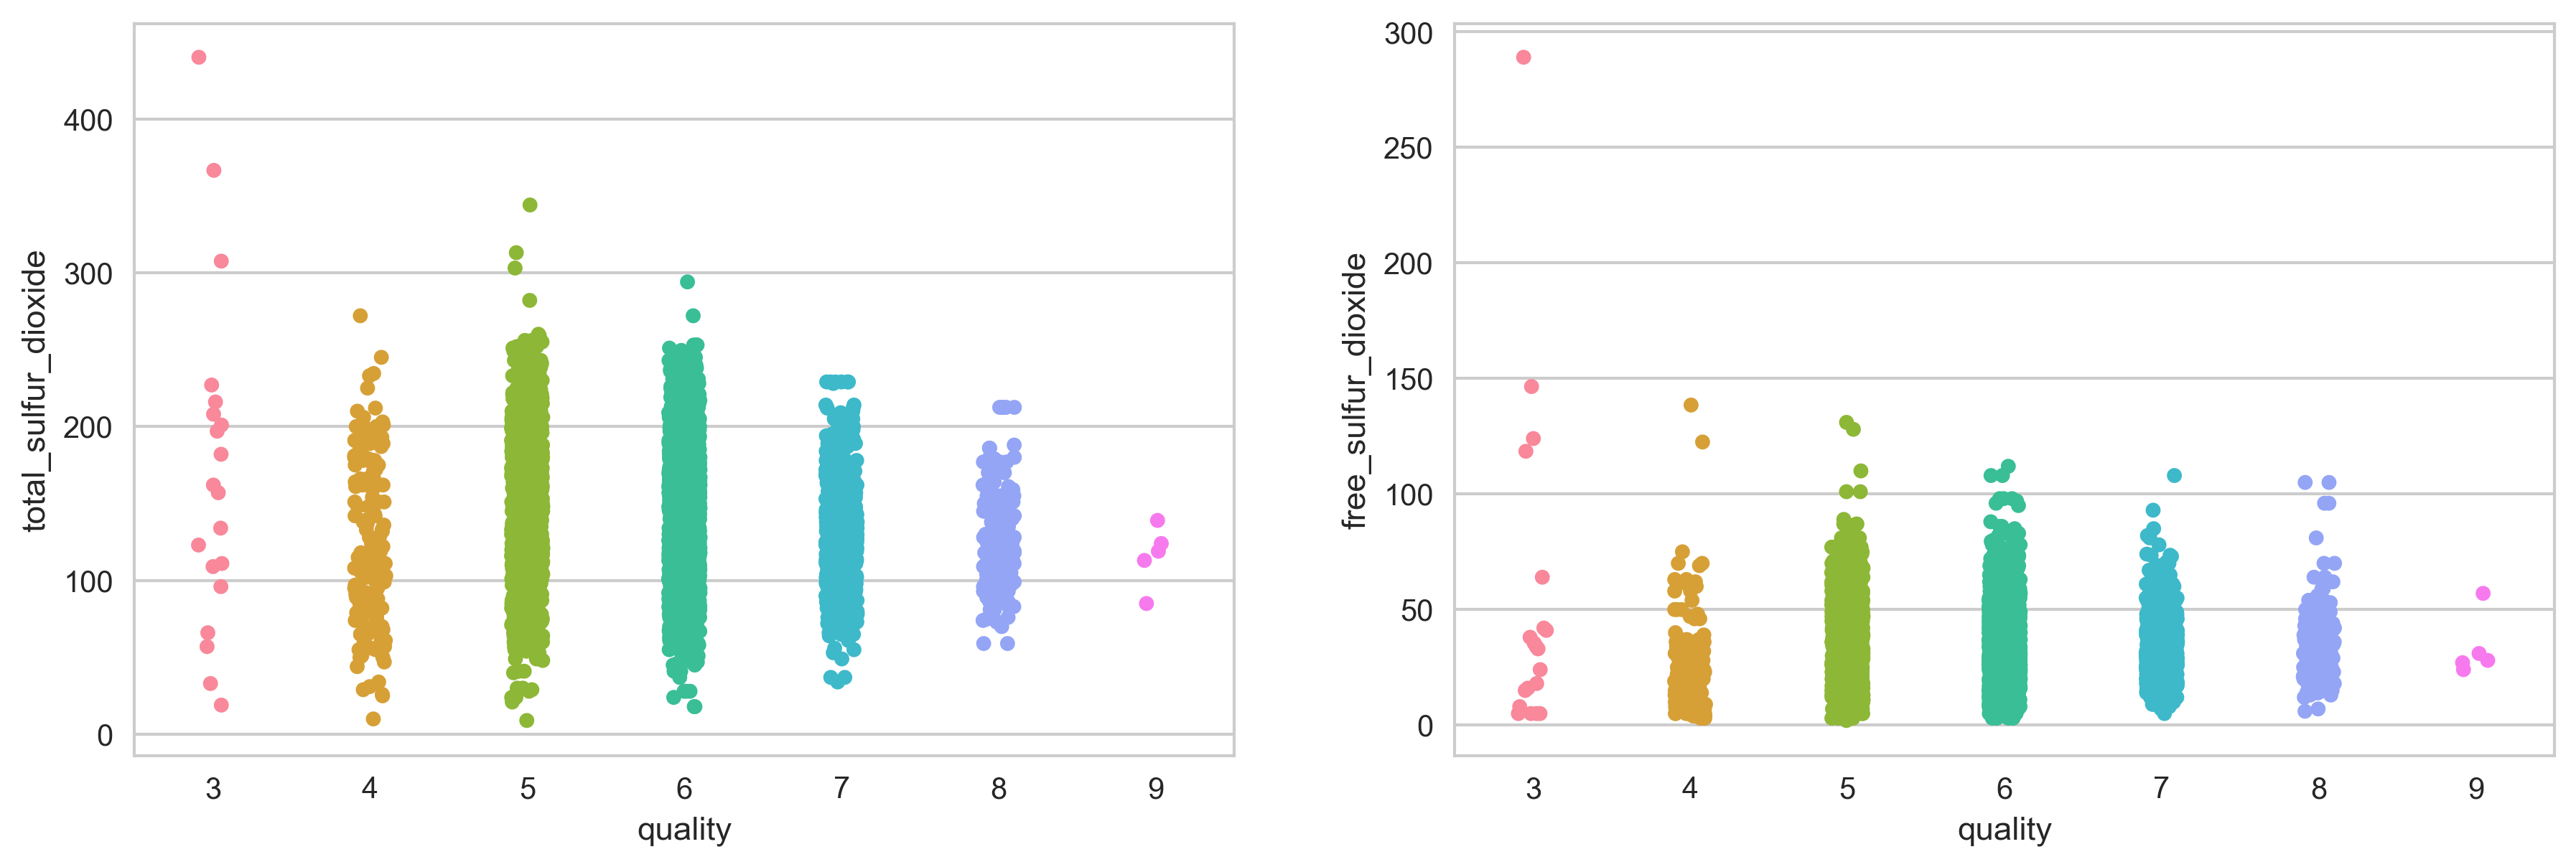

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=white_wine_df, x="quality", y="total_sulfur_dioxide", jitter=True, ax=ax1)
sns.stripplot(data=white_wine_df, x="quality", y="free_sulfur_dioxide", jitter=True, ax=ax2)

In [58]:
high_qual_ww_tsd_mean = white_wine_df[white_wine_df["quality"] >= 7]["total_sulfur_dioxide"].mean()
high_qual_ww_tsd_mean = format(high_qual_ww_tsd_mean, '.1f')
print"The mean for higher quality white wines (quality >= 7) is " + high_qual_ww_tsd_mean

The mean for higher quality white wines (quality >= 7) is 125.2


## Interpretation White Wines

Both plots show, that higher quality white wines tend to have less total sulfur dioxide in it.

## Red Wines

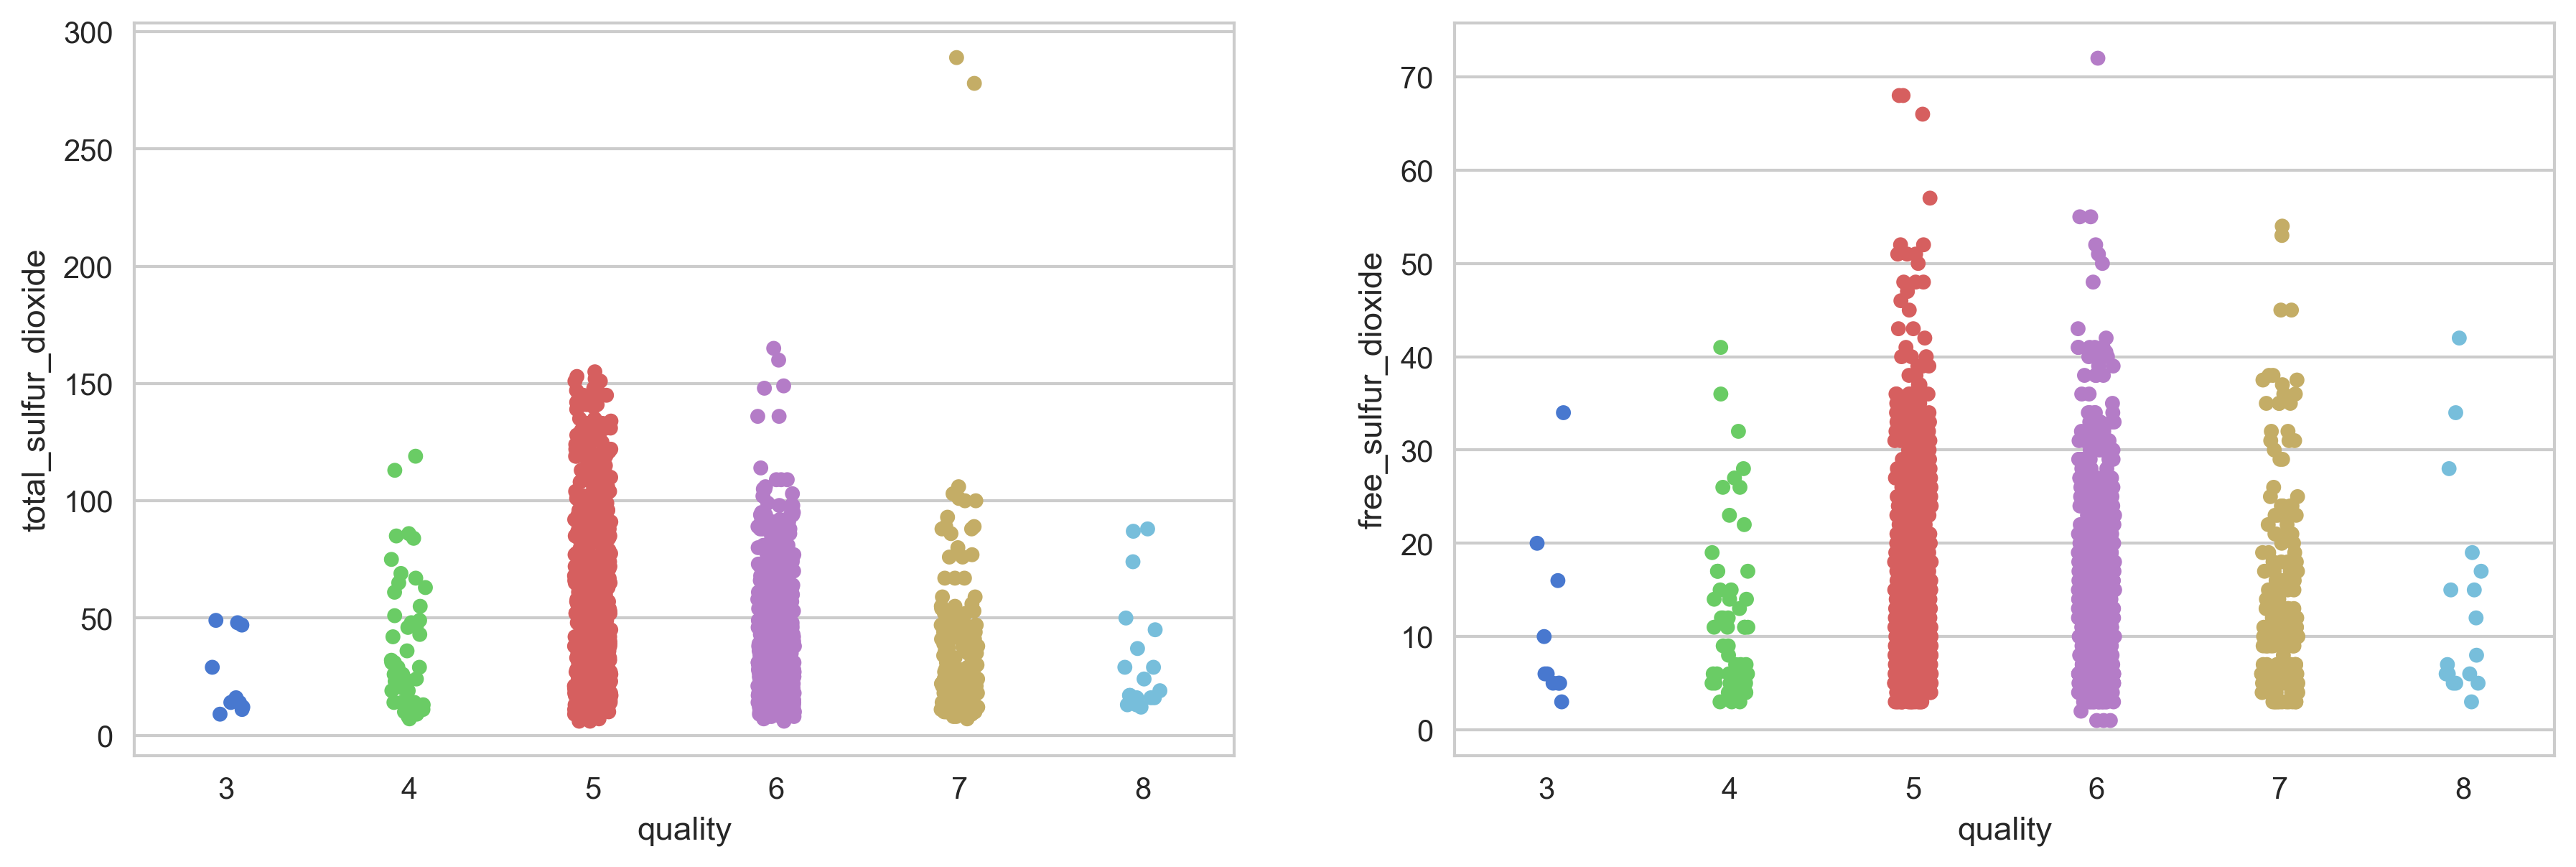

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=red_wine_df, x="quality", y="total_sulfur_dioxide", jitter=True, ax=ax1)
sns.stripplot(data=red_wine_df, x="quality", y="free_sulfur_dioxide", jitter=True, ax=ax2)

In [63]:
high_qual_ww_tsd_mean = red_wine_df[red_wine_df["quality"] >= 7]["total_sulfur_dioxide"].mean()
high_qual_ww_tsd_mean = format(high_qual_ww_tsd_mean, '.1f')
print"The mean for higher quality white wines (quality >= 7) is " + high_qual_ww_tsd_mean

The mean for higher quality white wines (quality >= 7) is 34.9


## Interpretation Red Wines

For the red wines, there are much lower concentrations of sulfur dioxides. Additionally, there seems to be no direct correlation between sulfur dioxide concentration and percepted quality.

# Conclusion: Sulfur Dioxides and Quality

Regarding high quality white wines (>= 7), those wines have a mean of sulfur dioxides of around 125. Respectively high quality Red Wines (>=7) have a mean concentration of sulfur dioxide of 35.

# Sulphates and Quality

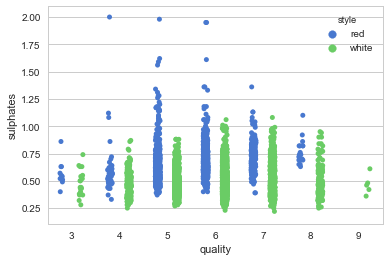

In [65]:
sns.stripplot(data=wine_df, x="quality", y="sulphates", jitter=True, hue="style", split=True)

## Alcohol in Wine

### White Wine

In [66]:
white_wine_df.groupby("quality")["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,20.0,10.345000,1.224089,8.0,9.55,10.45,11.00,12.6
4,163.0,10.152454,1.003217,8.4,9.40,10.10,10.75,13.5
5,1457.0,9.808840,0.847065,8.0,9.20,9.50,10.30,13.6
6,2198.0,10.575372,1.147776,8.5,9.60,10.50,11.40,14.0
7,880.0,11.367936,1.246536,8.6,10.60,11.40,12.30,14.2
8,175.0,11.636000,1.280138,8.5,11.00,12.00,12.60,14.0
9,5.0,12.180000,1.013410,10.4,12.40,12.50,12.70,12.9


### Red Wine

In [67]:
red_wine_df.groupby("quality")["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


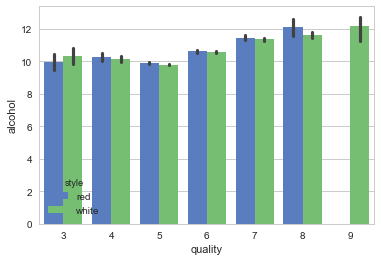

In [68]:
sns.barplot(data=wine_df, x="quality", y="alcohol", hue="style")

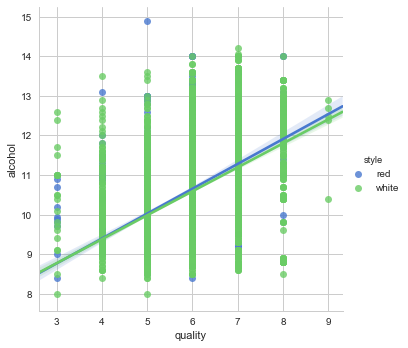

In [69]:
sns.lmplot(data=wine_df, x="quality", y="alcohol", hue="style")

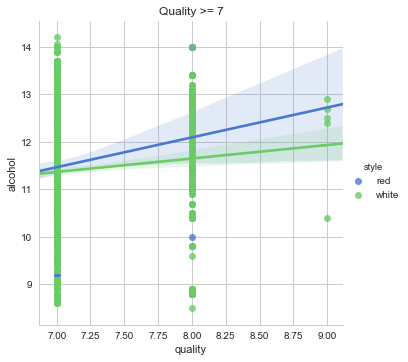

In [71]:
hq_wines = wine_df[wine_df.quality >= 7]
sns.lmplot(data=hq_wines, x="quality", y="alcohol", hue="style")
plt.title("Quality >= 7")

## Chlorides

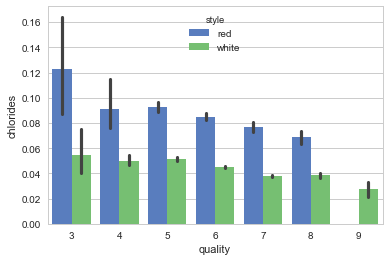

In [75]:
sns.barplot(data=wine_df, hue="style", x="quality", y="chlorides")

## The less chlorides in a wine the higher the quality.

## Chlorides and Alcohol

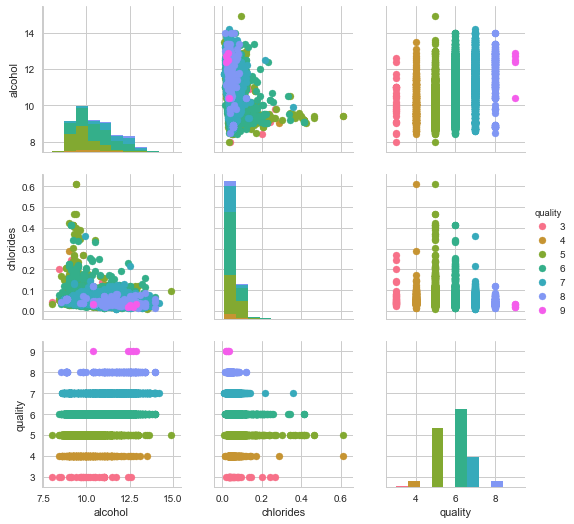

In [76]:
g = sns.PairGrid(wine_df[["alcohol", "chlorides", "quality"]], hue="quality")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

### Acids

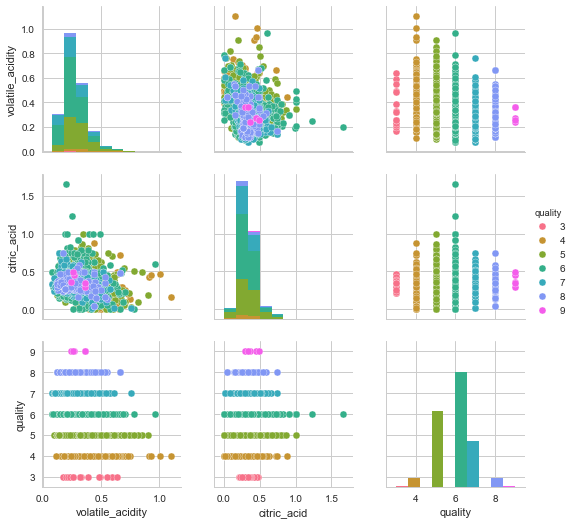

In [78]:
sns.pairplot(white_wine_df[["volatile_acidity", "citric_acid", "quality"]], hue="quality")

## taking all relevant attributes together [white wine]

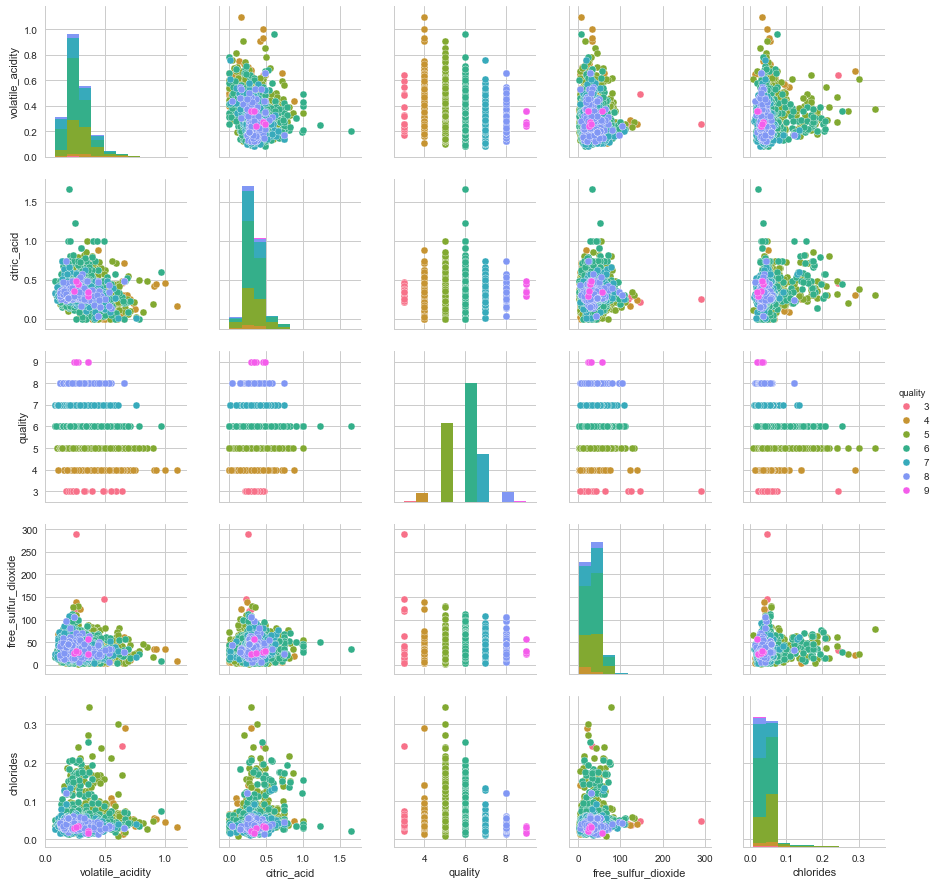

In [79]:
sns.pairplot(white_wine_df[["volatile_acidity", "citric_acid", "quality", "free_sulfur_dioxide", "chlorides"]], hue="quality")

In [80]:
white_wine_df[["volatile_acidity", "citric_acid", "quality"]].groupby("quality").describe(percentiles=[])

citric_acid                                        volatile_acidity  \
              count      mean       std   min    50%   max            count   
quality                                                                       
3              20.0  0.336000  0.081460  0.21  0.345  0.47             20.0   
4             163.0  0.304233  0.163857  0.00  0.290  0.88            163.0   
5            1457.0  0.337653  0.140814  0.00  0.320  1.00           1457.0   
6            2198.0  0.338025  0.119325  0.00  0.320  1.66           2198.0   
7             880.0  0.325625  0.079183  0.01  0.310  0.74            880.0   
8             175.0  0.326514  0.085439  0.04  0.320  0.74            175.0   
9               5.0  0.386000  0.082037  0.29  0.360  0.49              5.0   

                                                
             mean       std   min   50%    max  
quality                                         
3        0.333250  0.140827  0.17  0.26  0.640  
4        0.381227  0.173463  0.11  0.32  1.100  
5        0.302011  0.100066  0.10  0.28  0.905  
6        0.260564  0.088142  0.08  0.25  0.965  
7        0.262767  0.091106  0.08  0.25  0.760  
8        0.277400  0.108029  0.12  0.26  0.660  
9        0.298000  0.057619  0.24  0.27  0.360

In [81]:
white_wine_df[["quality", "free_sulfur_dioxide", "chlorides"]].groupby("quality").describe(percentiles=[])

chlorides                                           \
            count      mean       std    min    50%    max   
quality                                                      
3            20.0  0.054300  0.046468  0.022  0.041  0.244   
4           163.0  0.050098  0.025888  0.013  0.046  0.290   
5          1457.0  0.051546  0.026496  0.009  0.047  0.346   
6          2198.0  0.045217  0.020453  0.015  0.043  0.255   
7           880.0  0.038191  0.010697  0.012  0.037  0.135   
8           175.0  0.038314  0.013164  0.014  0.036  0.121   
9             5.0  0.027400  0.007436  0.018  0.031  0.035   

        free_sulfur_dioxide                                           
                      count       mean        std   min   50%    max  
quality                                                               
3                      20.0  53.325000  69.420776   5.0  33.5  289.0  
4                     163.0  23.358896  20.391349   3.0  18.0  138.5  
5                    1457.0  36.432052  18.145991   2.0  35.0  131.0  
6                    2198.0  35.650591  15.735679   3.0  34.0  112.0  
7                     880.0  34.125568  13.244737   5.0  33.0  108.0  
8                     175.0  36.720000  16.203675   6.0  35.0  105.0  
9                       5.0  33.400000  13.427584  24.0  28.0   57.0

## Final Conclusion

no attribute alone is strong enough to define a high quality wine, but as the figures show. For a wine to score high, having the acids and sulfur dioxide values all within in a certain range can help.

# Best vs Worst

when comparing the best (8,9) vs. worst (3,4) we can see that they well overlap each other.

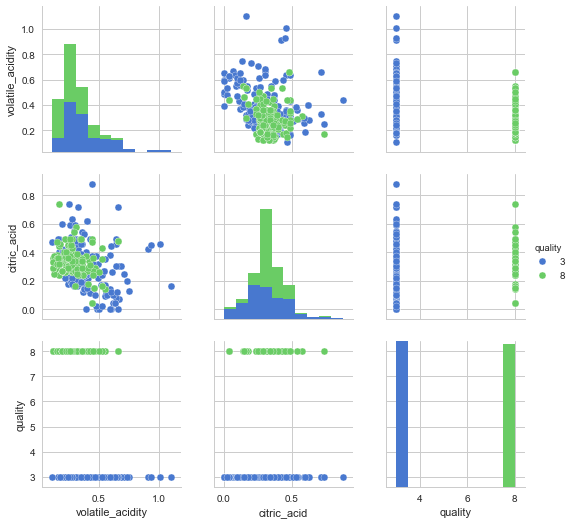

In [84]:
qual3 = white_wine_df[white_wine_df["quality"] == 3]
qual4 = white_wine_df[white_wine_df["quality"] == 4].copy()
qual4.quality = 3
qual8 = white_wine_df[white_wine_df["quality"] == 8]
qual9 = white_wine_df[white_wine_df["quality"] == 9].copy()
qual9.quality = 8
white_wine_sample = pd.concat([qual3, qual4, qual8, qual9], ignore_index=True)
white_wine_sample
sns.pairplot(white_wine_sample[["volatile_acidity", "citric_acid", "quality"]], hue="quality")

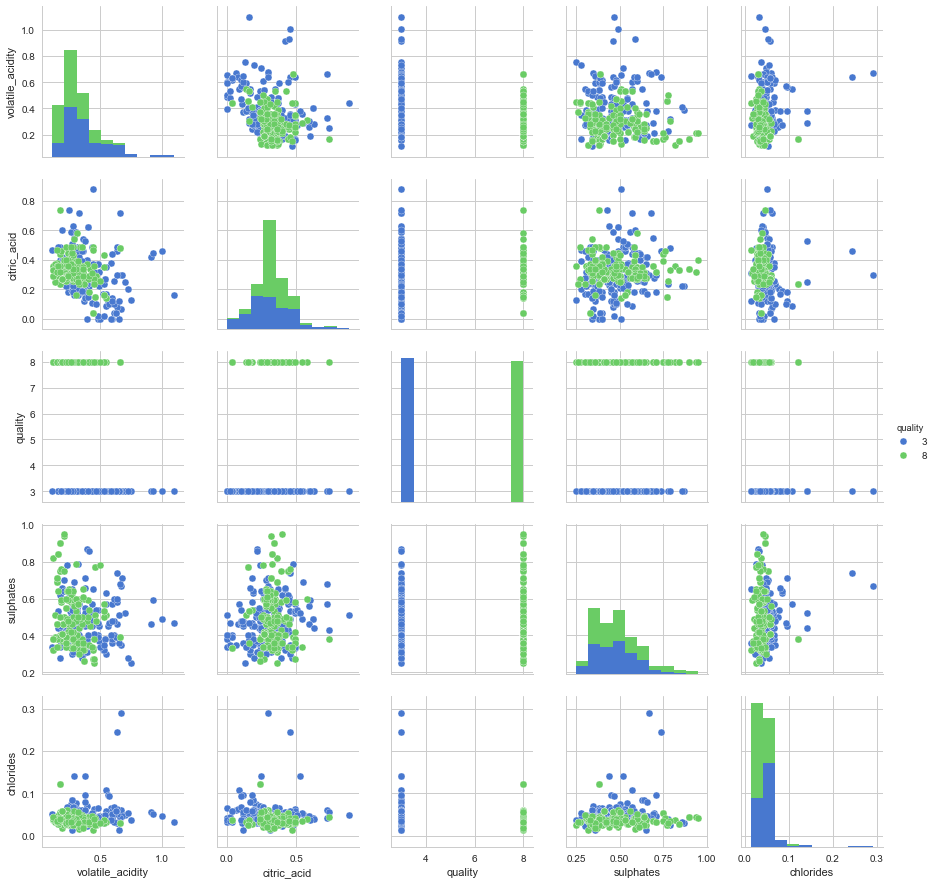

In [85]:
sns.pairplot(white_wine_sample[["volatile_acidity", "citric_acid", "quality", "sulphates", "chlorides"]], hue="quality")

# Final Conclusion for Wines

### White Wines

In [87]:
qual8[["quality", "chlorides", "alcohol", "citric_acid", "sulphates"]].describe(percentiles=[])

,quality,chlorides,alcohol,citric_acid,sulphates
count,175.0,175.000000,175.000000,175.000000,175.000000
mean,8.0,0.038314,11.636000,0.326514,0.486229
std,0.0,0.013164,1.280138,0.085439,0.147073
min,8.0,0.014000,8.500000,0.040000,0.250000
50%,8.0,0.036000,12.000000,0.320000,0.460000
max,8.0,0.121000,14.000000,0.740000,0.950000


### Red Wines

In [89]:
rqual8 = red_wine_df[red_wine_df["quality"] >= 8]
rqual8[["quality", "chlorides", "alcohol", "citric_acid", "sulphates"]].describe(percentiles=[])

,quality,chlorides,alcohol,citric_acid,sulphates
count,18.0,18.000000,18.000000,18.000000,18.000000
mean,8.0,0.068444,12.094444,0.391111,0.767778
std,0.0,0.011678,1.224011,0.199526,0.115379
min,8.0,0.044000,9.800000,0.030000,0.630000
50%,8.0,0.070500,12.150000,0.420000,0.740000
max,8.0,0.086000,14.000000,0.720000,1.100000
